In [91]:
import numpy as np
import librosa.display
import librosa
import matplotlib.pyplot as plt
import pandas as pd

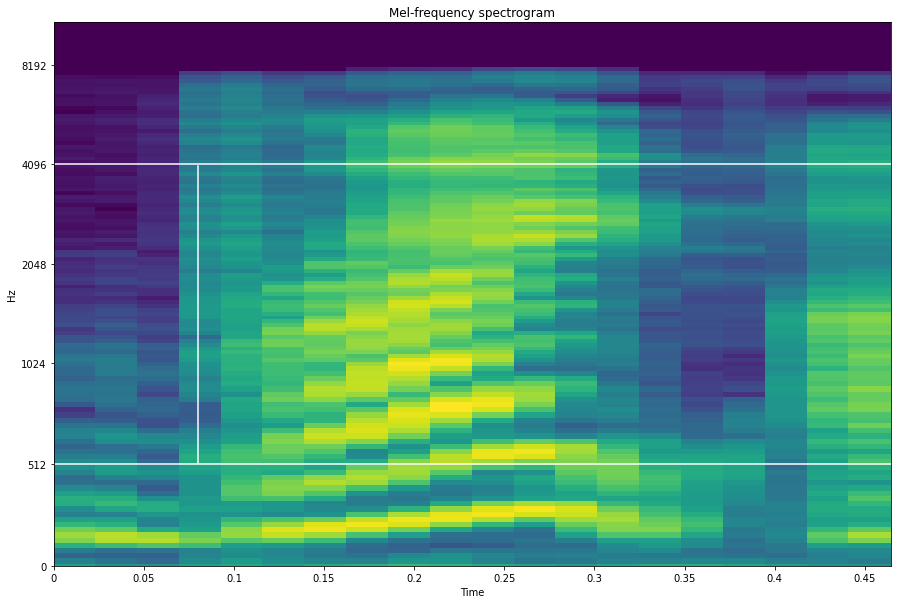

In [90]:
sig, rate = librosa.load("/Users/nika/Desktop/S004_0000001605.wav")
S = librosa.feature.melspectrogram(y=sig, sr=rate)
fig, ax = plt.subplots(figsize=(15,10))
# plt.text(150, 0.75, "HERE")
S_dB = librosa.power_to_db(S[:,50:70], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=rate, ax=ax, cmap='viridis')
# fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
ax.axhline(4096, color='w', linestyle='-', alpha=1)
ax.axhline(512, color='w', linestyle='-', alpha=1)
ax.axvline(0.08, ymin=0.19, ymax=0.735, color='w', linestyle='-', alpha=1)

fig.savefig('/Users/nika/Desktop/test.png', dpi=300)

In [82]:
S[:,:100].shape

(128, 100)

In [104]:
df = pd.read_csv("../abx.csv", header=None)

df.iloc[:,9].mean()

29.395263157894732

In [186]:
fname = '/Users/nika/Documents/UMD/2021_4S/Computational_psycholinguistics_Naomi_Feldman/FinalProject/cue_weighting_noise/results_mu.csv'
df = pd.read_csv(fname)
del df['Unnamed: 0']
df

,I1,I2,Ieq,I1_noise,I2_noise,I_eq_noise,I1_noise2,I2_noise2,I_eq_noise2
0,0.721928,0.721928,0.721921,0.721901,0.721928,0.721908,0.721928,0.721901,0.721908


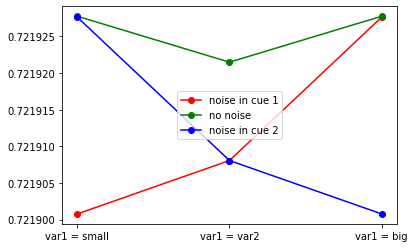

In [187]:
import matplotlib.pyplot as plt


#specify x-axis locations
x_ticks = [2,4,6]
y_clean = [df['I1'],df['Ieq'],df['I2']]
y_noise1 = [df['I1_noise'],df['I_eq_noise'],df['I2_noise']]
y_noise2 = [df['I1_noise2'],df['I_eq_noise2'],df['I2_noise2']]

#specify x-axis labels
x_labels = ['var1 = small','var1 = var2','var1 = big'] 

plt.plot(x_ticks,y_noise1, 'or-')
plt.plot(x_ticks,y_clean, 'og-')
plt.plot(x_ticks,y_noise2, 'ob-')
#add x-axis values to plot
plt.xticks(x_ticks, x_labels)
plt.legend(['noise in cue 1','no noise','noise in cue 2'], loc="center")

plt.show()